In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

In [2]:
# we want to keep attributes
xr.set_options(keep_attrs=True)

In [3]:
# create variable info class for model
class modelclass:
    def __init__(self, userexp, runame,plstyle):
        self.userexp = userexp # XXXYYY
        self.runame = runame # name of the run
        self.plstyle = plstyle 
        self.histogram = []

In [4]:
# define the runs to be plotted
modelruns =[] # init
modelruns.append(modelclass("000000","RADKLIM","k-"))
modelruns.append(modelclass("000001","RADKLIM EUR-11","k--"))

modelruns.append(modelclass("056524","REMO2015","c-"))
modelruns.append(modelclass("036030","REMO2020$_{27}$","r-"))
modelruns.append(modelclass("036031","REMO2020$_{27}$ Shallow","r--"))
modelruns.append(modelclass("036032","REMO2020$_{49}$","b-"))
modelruns.append(modelclass("036033","REMO2020$_{49}$ no-Prog","b--"))
modelruns.append(modelclass("036036","REMO2020$_{49}$ Wetcore","b:"))
modelruns.append(modelclass("036037","REMO2020$_{49}$ Shallow","b-."))

In [5]:
# datapath
dpath = "./data_in/model_data/histogram/"

In [6]:
# figure path
figpath = "./figures/"

In [7]:
# define star year and end year
ystart=2001
yend=2010

In [8]:
for obj in modelruns: # open data
    obj.histogram = []
    obj.histogram = xr.open_dataset(dpath+"RADKLIM_1h_precipitation_hist_"+obj.userexp+"_"+str(ystart)+"-"+str(yend)+".nc",cache=False)
    obj.histogram = obj.histogram.varri.where(obj.histogram.varri > 0, drop=True) # cut zeroes

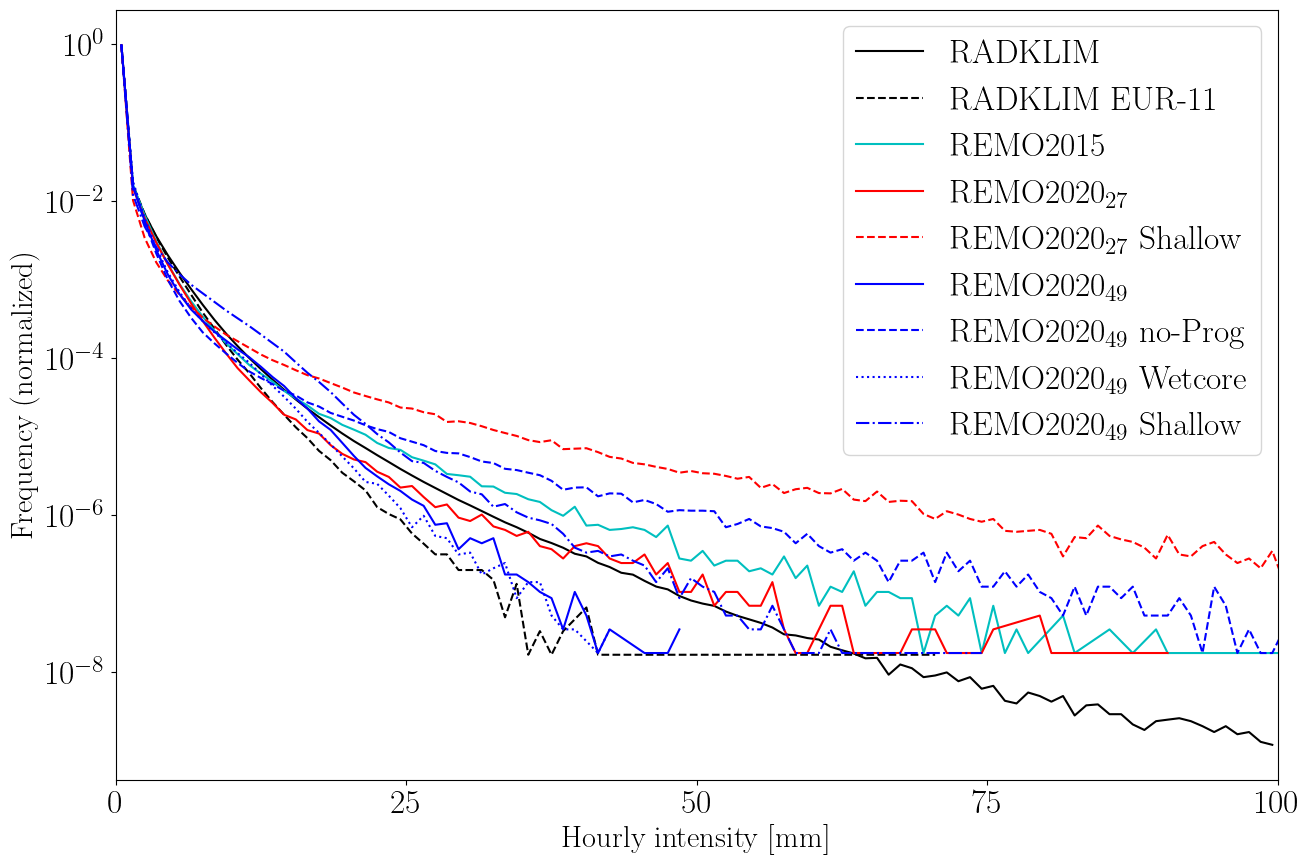

In [9]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.subplot.hspace"] = 0.7
plt.rcParams["axes.titlesize"] = 26
plt.rcParams['axes.labelsize'] = 22
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 
plt.rc('legend',fontsize=24)

for obj in modelruns: # loop over simulations
    # plot the histogram (line-plot) and do the normalization
    plt.semilogy(obj.histogram.bins.values,obj.histogram.values/np.sum(obj.histogram.values),obj.plstyle)
    # title
    titletext = ""
    plt.title(titletext)
    plt.xlabel('Hourly intensity [mm]')
    plt.xlim([0,100]) # x-limit
    plt.xticks([0,25,50,75,100]) # x-ticks
    plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1]) # y-ticks
    plt.ylabel("Frequency (normalized)")

# add legend
leg=plt.legend(([obj.runame for obj in modelruns]), ncol=1)
leg.draw_frame(True)
# save figure
plt.savefig(figpath+'RADKLIM_1hprecip_histogram_Germany_'+str(ystart)+'-'+str(yend)+'.png',format="png",bbox_inches='tight', pad_inches=0)